___
# Capítulo 6 - Análise de Clusters
## Seção 1 - aplicando o K-means
___

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('seaborn-whitegrid')

In [13]:
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
variable_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names

## Construindo e rodando o seu modelo

In [14]:
clustering = KMeans(n_clusters=3, random_state=5).fit(X)

clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

## Graficando o resultado do seu modelo

Text(0.5, 1.0, 'K-Means')

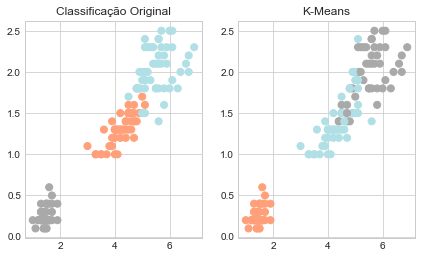

In [15]:
cores = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[clustering.labels_],
            s=50)
plt.title('K-Means')

Text(0.5, 1.0, 'K-Means')

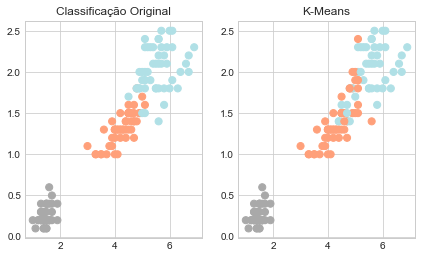

In [19]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64) 

#metodo faz a mudança dos labels 0,1 e 2 do clustering respectivamente por 2, 0 e 1 para que as cores nos dois plots fiquem iguais.


plt.subplot(1,2,1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1,2,2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[relabel],
            s=50)
plt.title('K-Means')

## Avaliando a clusterização resultante

In [20]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

